# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [43]:
loan = pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [44]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [45]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: This is pretty tricky, feel free to reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

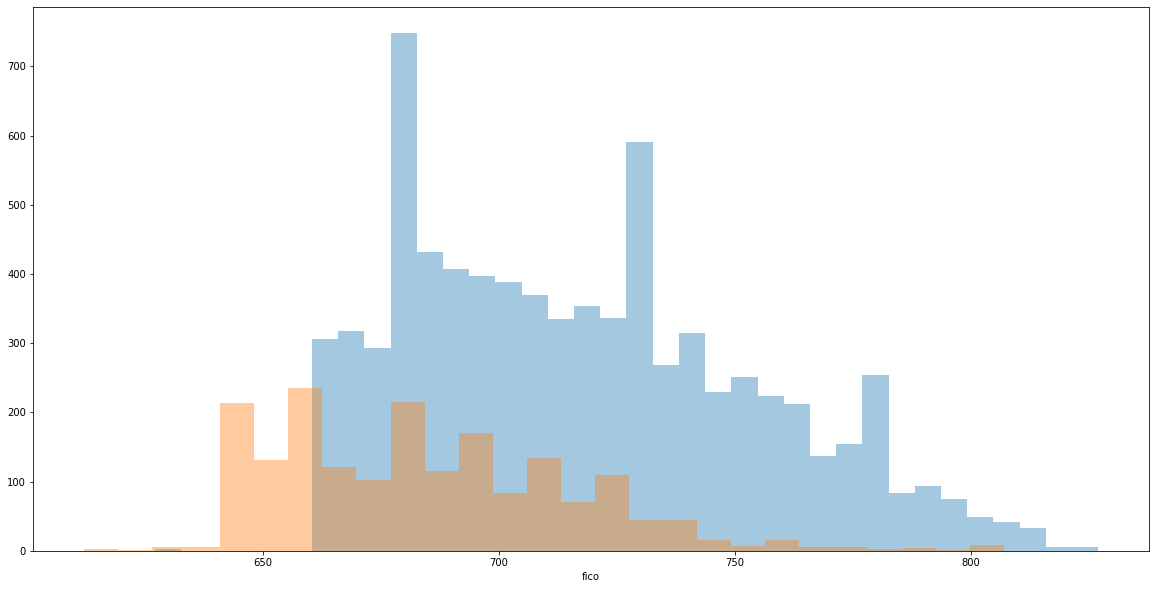

In [46]:
plt.figure(figsize = (20,10))
sns.distplot(loan['fico'][loan['credit.policy']==1],kde =False)
sns.distplot(loan['fico'][loan['credit.policy']==0],kde =False)

plt.show()

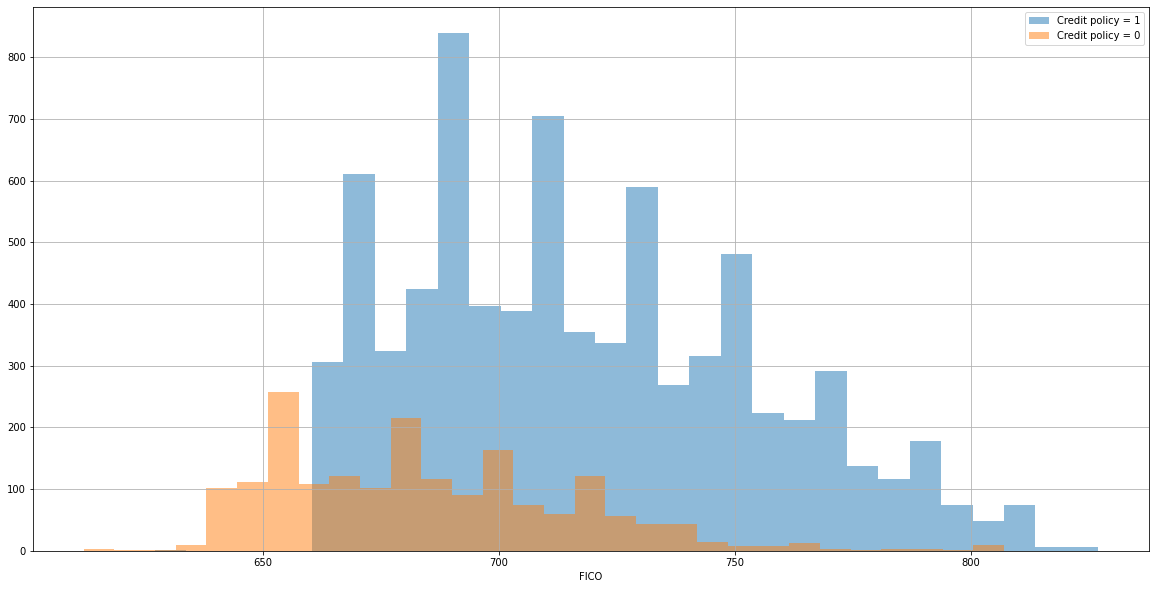

In [47]:
plt.figure(figsize = (20,10))
loan['fico'][loan['credit.policy']==1].hist(alpha = 0.5,bins = 30, label='Credit policy = 1')
loan['fico'][loan['credit.policy']==0].hist(alpha = 0.5, bins = 30, label = 'Credit policy = 0')
plt.legend()
plt.xlabel('FICO')

plt.show()

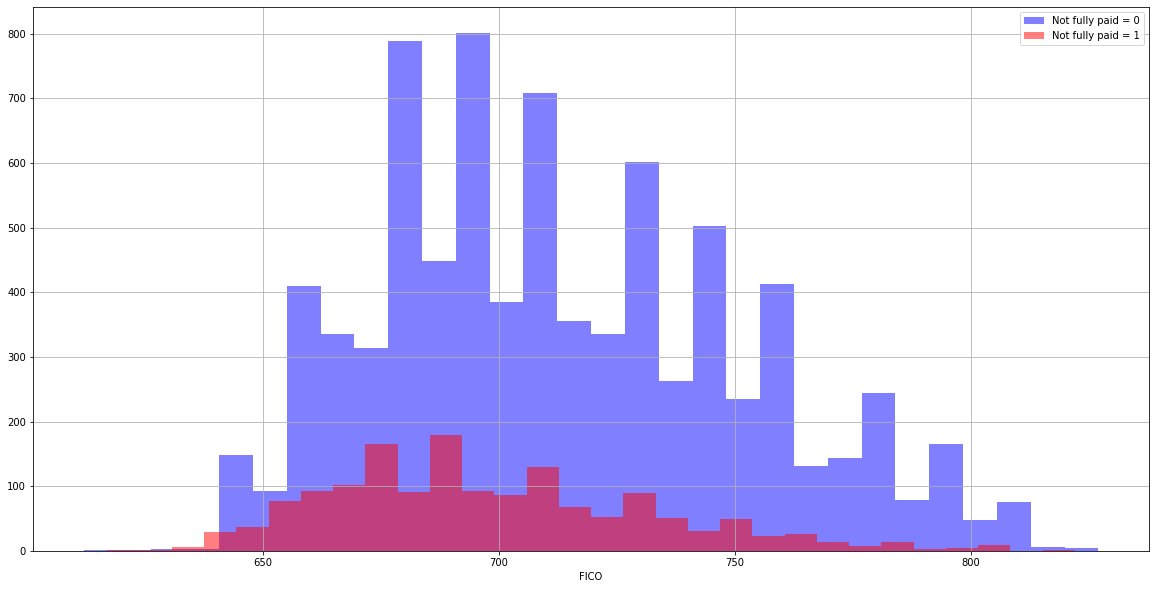

In [48]:
plt.figure(figsize = (20,10))
loan['fico'][loan['not.fully.paid']==0].hist(alpha = 0.5, bins = 30, color ='blue', label='Not fully paid = 0')
loan['fico'][loan['not.fully.paid']==1].hist(alpha = 0.5, color='red', bins = 30,label='Not fully paid = 1')
plt.legend()
plt.xlabel('FICO')
plt.show()

** Create a similar figure, except this time select by the not.fully.paid column.**

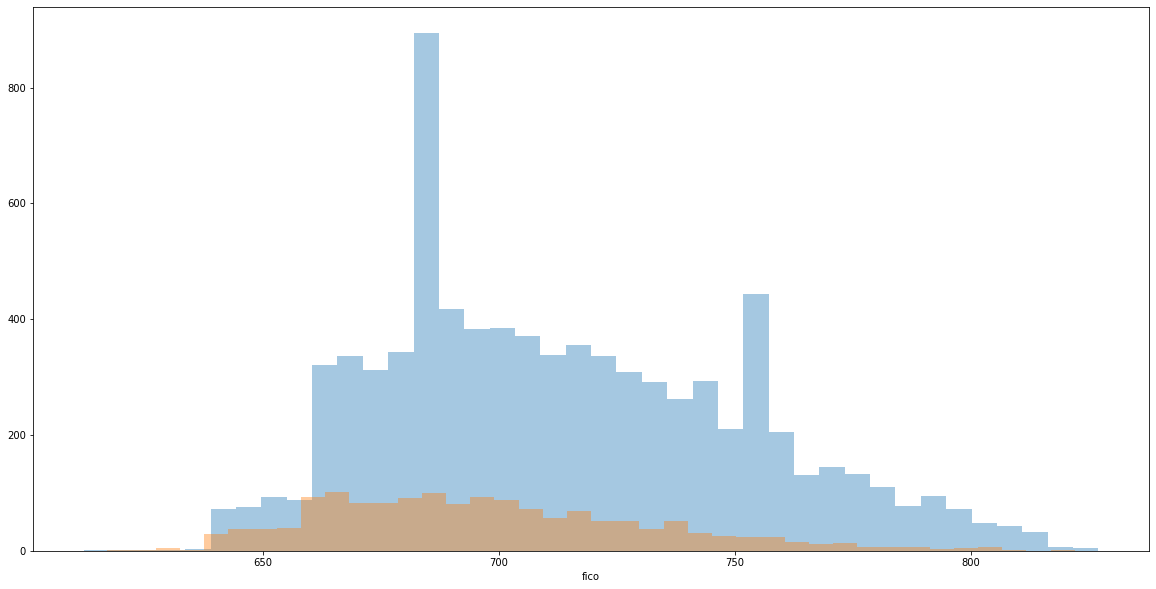

In [49]:
plt.figure(figsize=(20,10))
sns.distplot(loan['fico'][loan['not.fully.paid']==0],kde =False, bins = 40)
sns.distplot(loan['fico'][loan['not.fully.paid']==1],kde =False, bins=40)
plt.show()

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

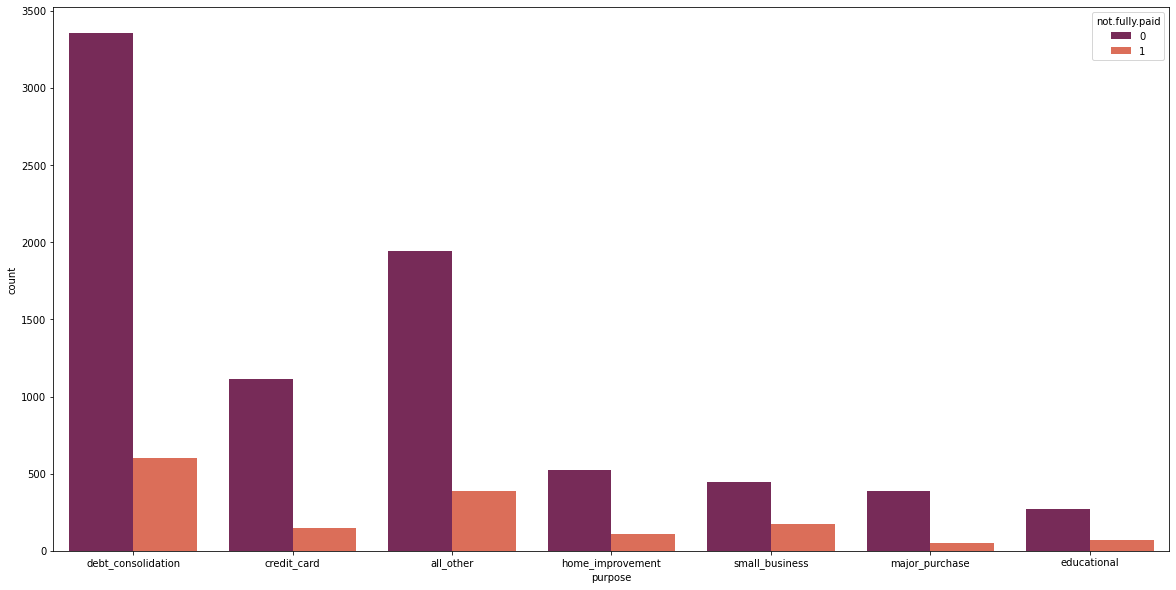

In [50]:
plt.figure(figsize =(20,10))
sns.countplot(data=loan,x = loan['purpose'],hue=loan['not.fully.paid'],palette='rocket')

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

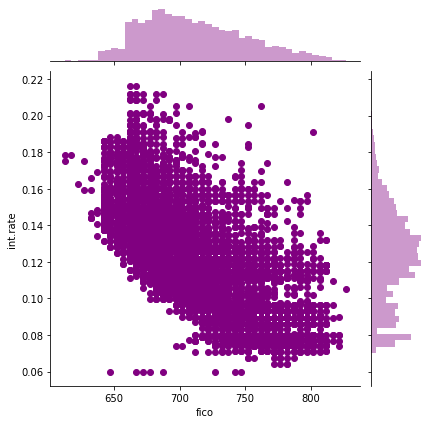

In [51]:
sns.jointplot(data = loan, x = 'fico',y='int.rate',color='purple')

<Figure size 1440x1440 with 0 Axes>

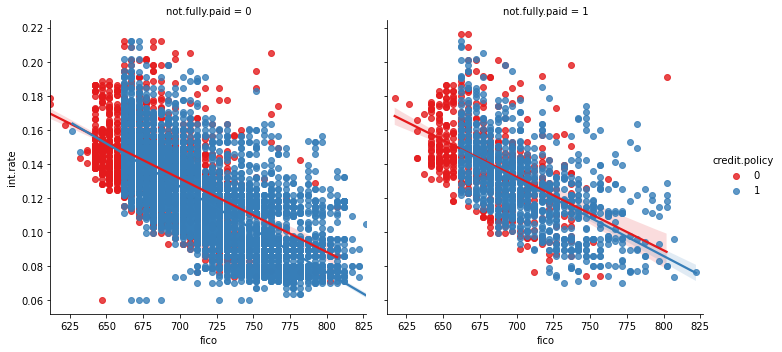

In [52]:
plt.figure(figsize=(20,20))
sns.lmplot(x = 'fico', y = 'int.rate', data = loan, hue='credit.policy',col='not.fully.paid',palette='Set1')
plt.show()

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [53]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [54]:
cat_feats = ['purpose']

In [55]:
loan = pd.get_dummies(loan, columns = cat_feats,drop_first=True)

In [56]:
loan.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(loan.drop('not.fully.paid',axis=1),loan['not.fully.paid'])

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [59]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [60]:
dtree = DecisionTreeClassifier()

In [61]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [63]:
predictions = dtree.predict(X_test)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

In [65]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1642  399]
 [ 258   96]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      2041
           1       0.19      0.27      0.23       354

    accuracy                           0.73      2395
   macro avg       0.53      0.54      0.53      2395
weighted avg       0.77      0.73      0.74      2395



## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [67]:
from sklearn.ensemble import RandomForestClassifier 

In [68]:
rfc = RandomForestClassifier()

In [69]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [70]:
predictions_rfc = rfc.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [72]:
print(classification_report(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2041
           1       0.37      0.02      0.04       354

    accuracy                           0.85      2395
   macro avg       0.61      0.51      0.48      2395
weighted avg       0.78      0.85      0.79      2395



In [73]:
print(confusion_matrix(y_test,predictions_rfc))

[[2029   12]
 [ 347    7]]


**What performed better the random forest or the decision tree?**

In [77]:
print('Decision Tree')
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print('-'*60)
print('Random Forest')
print(confusion_matrix(y_test,predictions_rfc))
print(classification_report(y_test,predictions_rfc))

Decision Tree
[[1642  399]
 [ 258   96]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      2041
           1       0.19      0.27      0.23       354

    accuracy                           0.73      2395
   macro avg       0.53      0.54      0.53      2395
weighted avg       0.77      0.73      0.74      2395

------------------------------------------------------------
Random Forest
[[2029   12]
 [ 347    7]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2041
           1       0.37      0.02      0.04       354

    accuracy                           0.85      2395
   macro avg       0.61      0.51      0.48      2395
weighted avg       0.78      0.85      0.79      2395



Better in prediction is Random forest (Accuracy for RF = 85% and for DT = 73%)

# Great Job!